# Computing $R \sin{i}$ from $v \sin{i}$ and Period

For the subsub project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

$$ v \sin{i} = \frac{2\pi R_{\star}}{P_{\mathrm{rot}}} \sin{i} $$
$$ R_{\star} \sin{i} = \frac{v \sin{i} \cdot P_{\mathrm{rot}}}{2 \pi}$$

In [2]:
import astropy.units as u

In [3]:
vsini = 10.0 * u.km/u.s # +/- 1.0
vsini_fractional_unc = (1.0*u.km/u.s)/vsini
vsini

<Quantity 10. km / s>

In [4]:
print(vsini_fractional_unc.to(u.percent))

10.0 %


In [5]:
P_rot = 23.5 * u.day # +/- 0.1
P_rot_fractional_unc = (0.1*u.day) / P_rot
P_rot

<Quantity 23.5 d>

In [6]:
R_sini = vsini * P_rot / (2.0 * np.pi)

In [7]:
R_sini.to(u.Rsun)

<Quantity 4.64493598 solRad>

What is the propagated uncertainty?

In [8]:
net_unc = np.hypot(vsini_fractional_unc, P_rot_fractional_unc)
net_unc.to(u.percent)

<Quantity 10.00904978 %>

The uncertainty in the $v\sin{i}$ dominates the net uncertainty, our formal statistical uncertainty in the rotation period is negligible in comparison.

In [9]:
R_sini.to(u.Rsun) * net_unc

<Quantity 0.46491395 solRad>

So we obtain: $R_{\star} \sin{i} = 4.6 \pm 0.5$

In [10]:
inc = np.arange(1, 90.1, 1)

In [11]:
sini = np.sin(np.radians(inc))

In [12]:
R_star = R_sini.to(u.Rsun) / sini

In [13]:
import seaborn as sns

In [14]:
sns.set_context('paper', font_scale=1.65)

In [15]:
upper_bound = R_star+R_star*0.1
lower_bound = R_star-R_star*0.1

In [16]:
plt.rcParams['figure.facecolor'] = 'white'

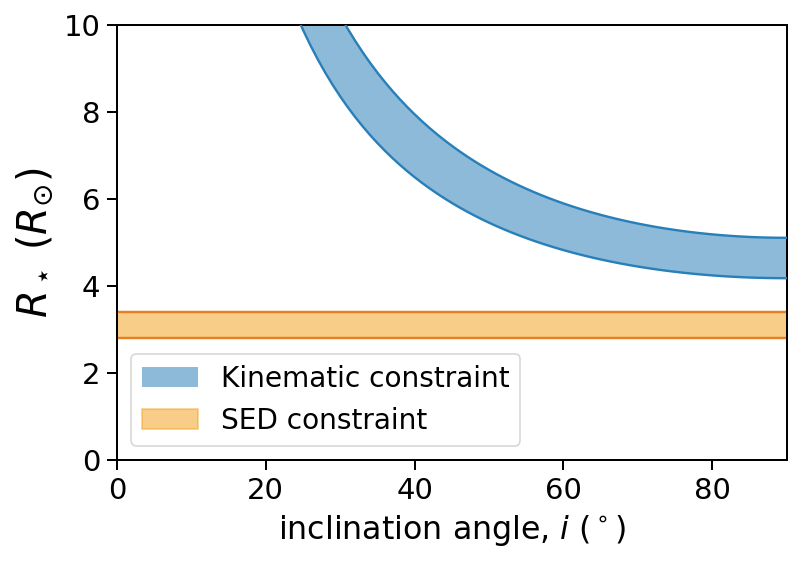

In [17]:
plt.plot(inc, upper_bound, zorder=10, color='#2980b9')
plt.plot(inc, lower_bound, zorder=10, color='#2980b9')
plt.fill_between(inc, upper_bound, lower_bound, alpha=0.5,
                 label='Kinematic constraint')
plt.ylim(0, 10)
plt.axhline(2.8, color='#e67e22')
plt.axhline(3.4, color='#e67e22')
plt.fill_between([0, 90], 2.8, 3.4, color='#f39c12', alpha=0.5,
                label='SED constraint')
plt.xlim(0, 90)
plt.xlabel('inclination angle, $i$ ($^\circ$)');
plt.ylabel('$R_\star \;(R_{\odot})$', fontsize=20)
plt.legend(fontsize=14)
plt.savefig('R_sini_demo.png', bbox_inches='tight', dpi=300)

Compare the uncertainties between the two systems:

In [18]:
net_unc_two_systems = np.hypot(0.5, 0.3) # R_sun

In [19]:
discrepancy = 1.5 # R_sun

How many sigma is that?

In [20]:
np.round(discrepancy / net_unc_two_systems, decimals = 1)

2.6